In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
chars = "a-e-i-o-u-y-sz-z-ź-ż-g-r".split('-')
data = np.genfromtxt('data/145244-clustersel.txt', delimiter='\t')
print(data.shape)
X = data[:,:-1]
print(X.shape)
y = data[:,-1].astype(int)
etykiety = [chars[nr%100]+str(nr//100) for nr in y]  # ['a1', 'e1', 'i1', .., 'r1', 'a2', 'e2', .., 'r4']

(48, 64)
(48, 63)


[0.69268245 0.14882846]
0.8415109120228643


Text(0.5, 1.0, 'Rozkład przypadków po redukcji wymiarowości')

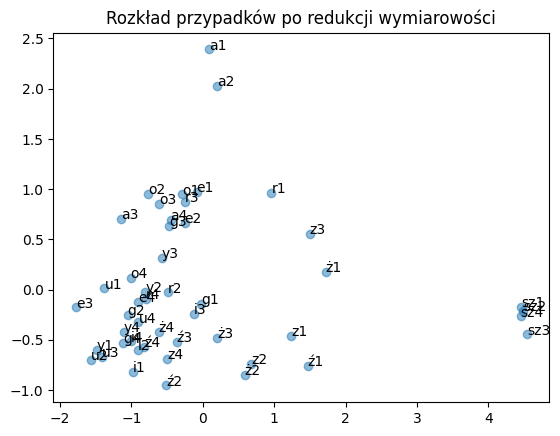

In [4]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5)
for i,pair in enumerate(X_reduced):
    plt.text(pair[0], pair[1], etykiety[i])

plt.title("Rozkład przypadków po redukcji wymiarowości")

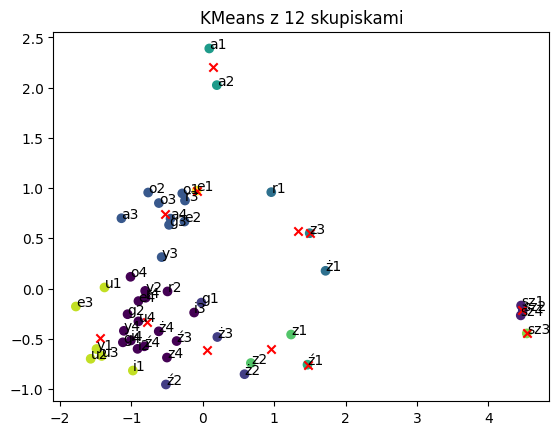

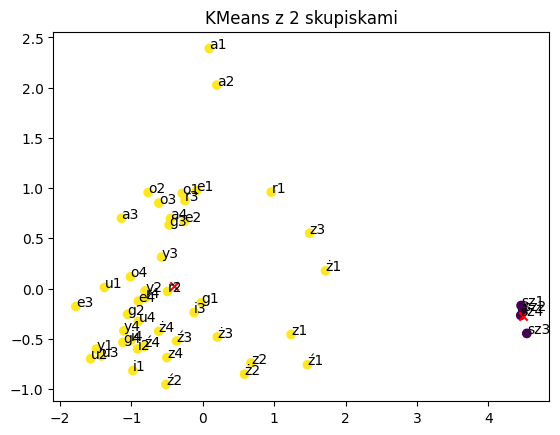

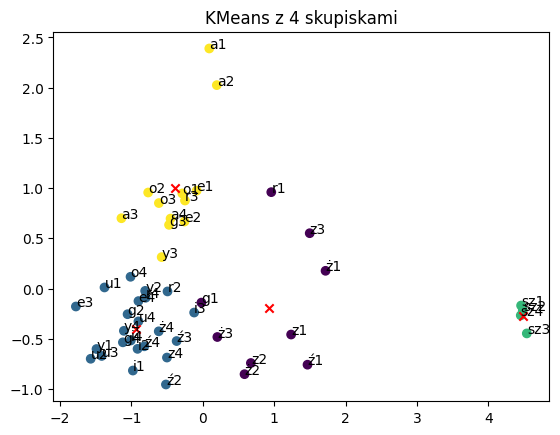

In [5]:
for n_clusters in [12, 2, 4]:
    k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
    k_means.fit(X)
    centroids = pca.transform(k_means.cluster_centers_)

    plt.scatter(*X_reduced.T, c=k_means.predict(X), cmap='viridis')
    plt.scatter(*centroids.T, marker='x', color='red')

    for i,pair in enumerate(X_reduced):
        plt.text(pair[0], pair[1], etykiety[i])

    plt.title(f"KMeans z {n_clusters} skupiskami")

    plt.show()

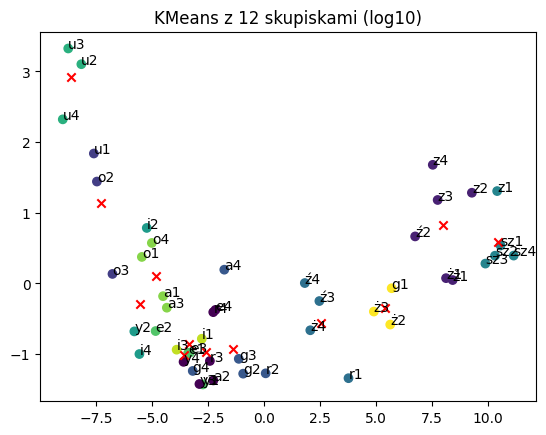

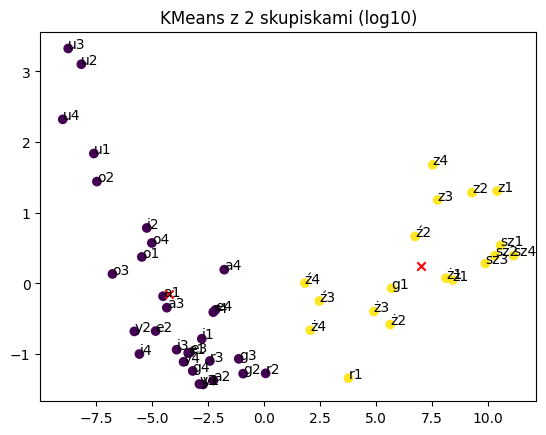

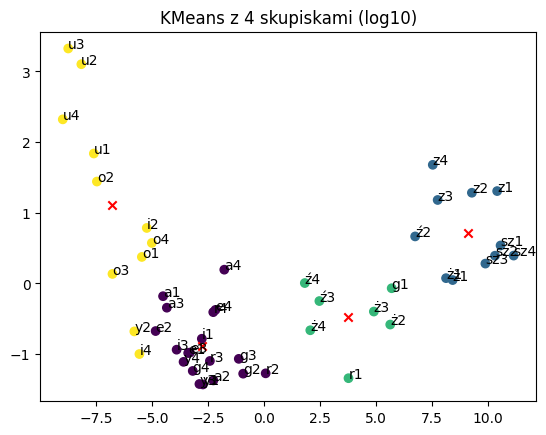

In [6]:
pca = PCA(n_components=2)
X_reduced_log = pca.fit_transform(np.log10(X))

for n_clusters in [12, 2, 4]:
    k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
    k_means.fit(np.log10(X))
    centroids = pca.transform(k_means.cluster_centers_)

    plt.scatter(*X_reduced_log.T, c=k_means.predict(np.log10(X)), cmap='viridis')
    plt.scatter(*centroids.T, marker='x', color='red')

    for i,pair in enumerate(X_reduced_log):
        plt.text(pair[0], pair[1], etykiety[i])

    plt.title(f"KMeans z {n_clusters} skupiskami (log10)")

    plt.show()

In [24]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, istruncate = False, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    if istruncate:
        dendrogram(linkage_matrix, truncate_mode="level", p=3, **kwargs)
    else:
        dendrogram(linkage_matrix, **kwargs)

Text(0.5, 1.0, 'Dendogram')

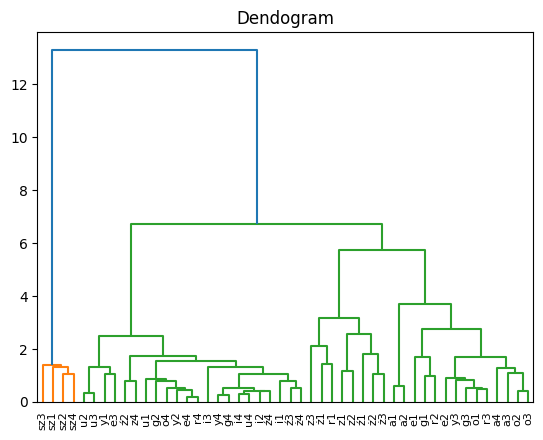

In [11]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

plot_dendrogram(model, labels=etykiety)
plt.title("Dendogram")

In [46]:
data_const = np.genfromtxt('data/145244-cluster-contspeech.txt', delimiter='\t')
print(data.shape)
X = data_const
print(X.shape)
X[0]

(48, 64)
(5000, 64)


array([2.4364e-01, 1.2878e-01, 2.2745e-02, 1.2326e-02, 2.6287e-02,
       1.3135e-02, 4.4267e-02, 8.6435e-03, 2.6323e-03, 2.7347e-03,
       3.4715e-03, 1.4108e-03, 8.8132e-04, 1.2231e-03, 5.0729e-04,
       8.9006e-04, 9.2472e-04, 5.8668e-04, 1.3685e-03, 7.0862e-04,
       6.7259e-04, 6.6251e-04, 1.9541e-04, 2.2772e-04, 3.3169e-04,
       2.5829e-04, 1.7173e-04, 1.9147e-04, 2.6459e-04, 3.9857e-04,
       2.2911e-04, 4.1442e-05, 3.0345e-05, 9.3430e-05, 5.6241e-05,
       5.0150e-05, 1.5063e-04, 8.6677e-05, 1.0762e-04, 1.0307e-04,
       6.2411e-05, 1.5304e-04, 1.1369e-04, 4.3603e-05, 4.2106e-05,
       8.9641e-05, 4.9058e-05, 4.7045e-05, 5.1651e-05, 4.0614e-05,
       4.9768e-05, 4.7500e-05, 5.3748e-05, 4.7996e-05, 2.1243e-05,
       4.5931e-05, 4.3012e-05, 2.3573e-05, 2.3062e-05, 5.7829e-05,
       3.6472e-05, 3.0506e-05, 5.6172e-05, 8.5341e-05])

[0.45436619 0.27280978]
0.7271759752887944


Text(0.5, 1.0, 'PCA - eksploracja danych')

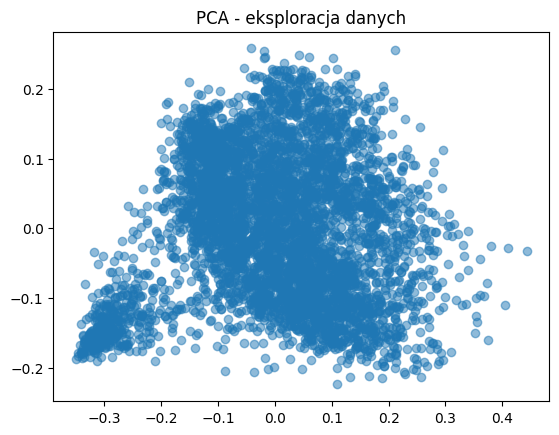

In [47]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5)
plt.title("PCA - eksploracja danych")
# for i,pair in enumerate(X_reduced):
#     plt.text(pair[0], pair[1], etykiety[i])

# plt.title("Rozkład przypadków po redukcji wymiarowości")

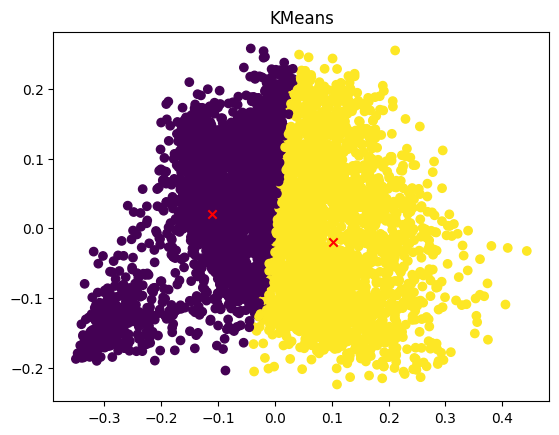

In [48]:
k_means = KMeans(init='k-means++', n_clusters=2, n_init='auto')
k_means.fit(X)
centroids = pca.transform(k_means.cluster_centers_)

plt.scatter(*X_reduced.T, c=k_means.predict(X), cmap='viridis')
plt.scatter(*centroids.T, marker='x', color='red')

# for i,pair in enumerate(X_reduced):
#     plt.text(pair[0], pair[1], etykiety[i])

plt.title(f"KMeans")

plt.show()

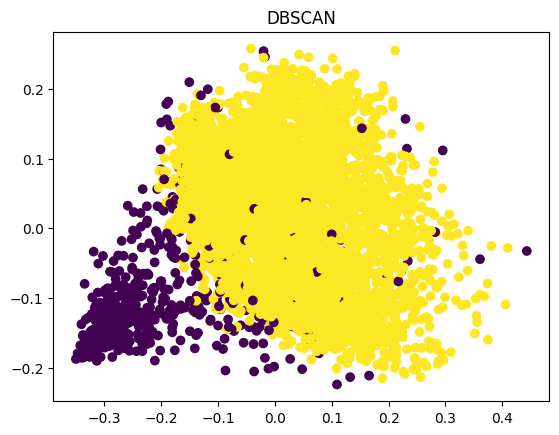

In [41]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=20).fit(X)

plt.scatter(*X_reduced.T, c=dbscan.labels_, cmap='viridis')
# plt.scatter(*centroids.T, marker='x', color='red')

# for i,pair in enumerate(X_reduced):
#     plt.text(pair[0], pair[1], etykiety[i])

plt.title(f"DBSCAN")

plt.show()


Text(0.5, 1.0, 'AgglomerativeClustering')

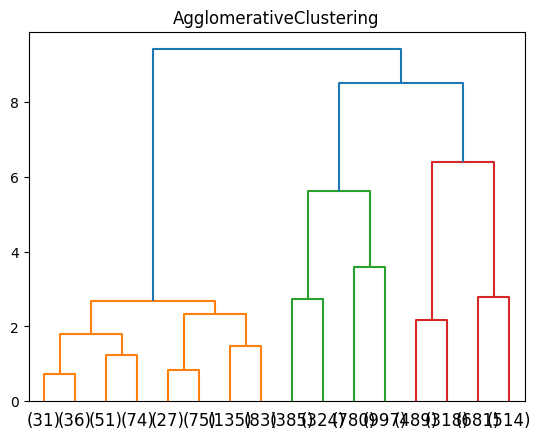

In [42]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

plot_dendrogram(model, True)
plt.title("AgglomerativeClustering")

In [49]:
data_const = np.genfromtxt('data/145244-cluster-contspeechviolin.txt', delimiter='\t')
print(data.shape)
X = data_const
print(X.shape)
X[0]

(48, 64)
(5000, 64)


array([2.6406e-03, 8.3898e-03, 7.4319e-02, 1.4324e-01, 1.3965e-02,
       8.2281e-02, 2.8300e-01, 1.2594e-02, 1.9178e-02, 6.3773e-02,
       7.8972e-03, 1.8547e-02, 7.6121e-02, 4.8033e-03, 1.5359e-02,
       4.5341e-02, 3.5111e-03, 3.8219e-03, 1.5811e-02, 2.2693e-03,
       2.5577e-03, 1.3433e-02, 2.6107e-03, 1.8003e-03, 2.6654e-03,
       7.3237e-04, 1.2052e-03, 1.0055e-02, 2.4416e-03, 1.5497e-03,
       5.0624e-03, 1.9339e-03, 6.5008e-04, 1.0765e-03, 6.2746e-04,
       1.8171e-04, 1.2013e-03, 3.0147e-04, 5.5488e-05, 6.2160e-04,
       1.9136e-04, 6.5933e-05, 1.7076e-03, 4.8495e-04, 2.2764e-05,
       1.2547e-03, 4.8384e-04, 2.8724e-05, 5.1542e-05, 4.8815e-05,
       7.2616e-05, 7.5944e-05, 7.3248e-05, 1.2317e-04, 7.2923e-05,
       5.2534e-05, 1.0456e-04, 2.0702e-04, 5.3678e-05, 7.2912e-05,
       1.2609e-04, 1.0273e-04, 1.5786e-04, 8.7320e-05])

[0.50151934 0.15828278]
0.6598021153982363


Text(0.5, 1.0, 'PCA - eksploracja danych')

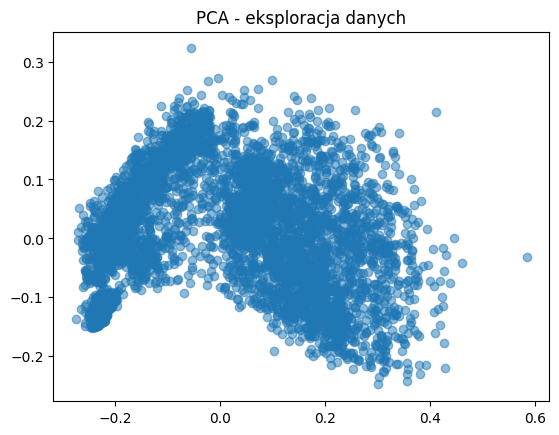

In [50]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5)
plt.title("PCA - eksploracja danych")
# for i,pair in enumerate(X_reduced):
#     plt.text(pair[0], pair[1], etykiety[i])

# plt.title("Rozkład przypadków po redukcji wymiarowości")

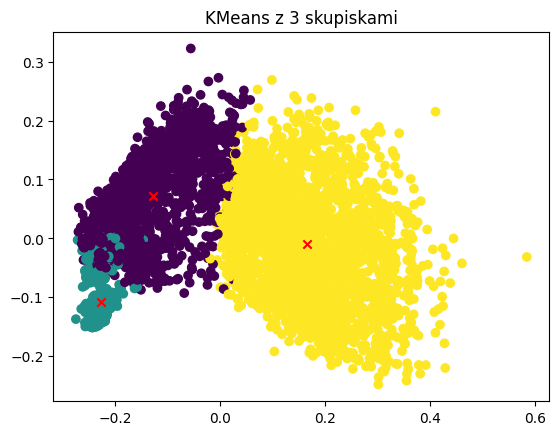

In [58]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init='auto')
k_means.fit(X)
centroids = pca.transform(k_means.cluster_centers_)

plt.scatter(*X_reduced.T, c='k_means.predict(X)', cmap='viridis')
plt.scatter(*centroids.T, marker='x', color='red')

# for i,pair in enumerate(X_reduced):
#     plt.text(pair[0], pair[1], etykiety[i])

plt.title(f"KMeans z {3} skupiskami")

plt.show()

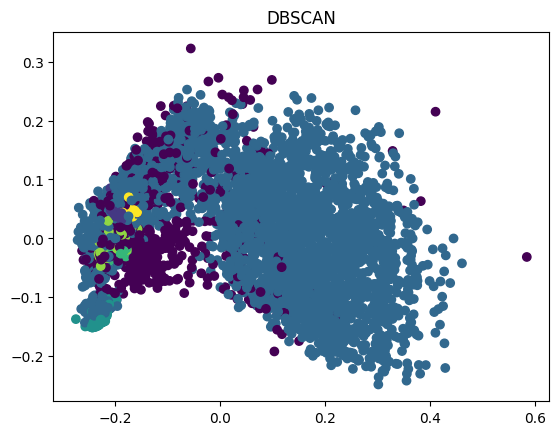

In [52]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=20).fit(X)

plt.scatter(*X_reduced.T, c=dbscan.labels_, cmap='viridis')
# plt.scatter(*centroids.T, marker='x', color='red')

# for i,pair in enumerate(X_reduced):
#     plt.text(pair[0], pair[1], etykiety[i])

plt.title(f"DBSCAN")

plt.show()


Text(0.5, 1.0, 'AgglomerativeClustering')

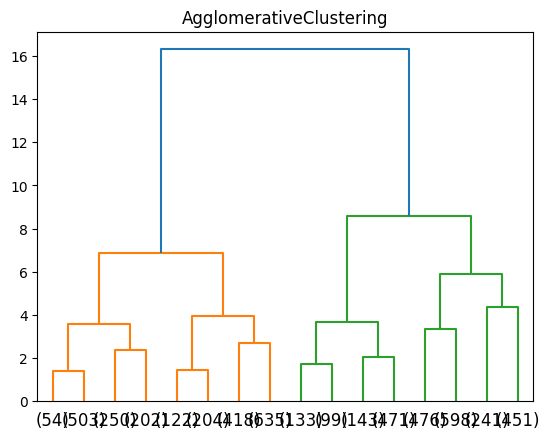

In [53]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

plot_dendrogram(model, True)
plt.title("AgglomerativeClustering")

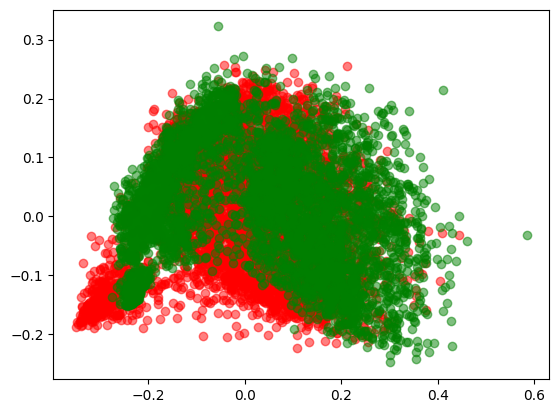

In [59]:
data_const = np.genfromtxt('data/145244-cluster-contspeech.txt', delimiter='\t')
data_const_violin = np.genfromtxt('data/145244-cluster-contspeechviolin.txt', delimiter='\t')


pca = PCA(n_components=2)
X_reduced_const = pca.fit_transform(data_const)

pca = PCA(n_components=2)
X_reduced_violin = pca.fit_transform(data_const_violin)


plt.scatter(X_reduced_const[:, 0], X_reduced_const[:, 1], alpha=0.5, c='red')
plt.scatter(X_reduced_violin[:, 0], X_reduced_violin[:, 1], alpha=0.5, c='green')
# for i,pair in enumerate(X_reduced):
#     plt.text(pair[0], pair[1], etykiety[i])

# plt.title("Rozkład przypadków po redukcji wymiarowości")